In [69]:
import numpy as np
import pandas as pd
from  sklearn.metrics import f1_score

In [2]:
import nltk

In [3]:
data = pd.read_csv('Womens Clothing E-Commerce Reviews.csv/Womens Clothing E-Commerce Reviews.csv', engine='python')
#data = pd.read_csv('rev.csv')

In [6]:
data.head(10)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses


In [5]:
data.isna().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [7]:
from sklearn.impute import SimpleImputer

miss= SimpleImputer(strategy='constant', fill_value='') 
miss.fit(data)

SimpleImputer(add_indicator=False, copy=True, fill_value='', missing_values=nan,
              strategy='constant', verbose=0)

In [8]:
idata =miss.transform(data)

In [9]:
idata

array([[0, 767, 33, ..., 'Initmates', 'Intimate', 'Intimates'],
       [1, 1080, 34, ..., 'General', 'Dresses', 'Dresses'],
       [2, 1077, 60, ..., 'General', 'Dresses', 'Dresses'],
       ...,
       [23483, 1104, 31, ..., 'General Petite', 'Dresses', 'Dresses'],
       [23484, 1084, 28, ..., 'General', 'Dresses', 'Dresses'],
       [23485, 1104, 52, ..., 'General Petite', 'Dresses', 'Dresses']],
      dtype=object)

In [10]:
train=pd.DataFrame(data=idata,    # values
              index=data.index,    # 1st column as index
            columns=data.columns)  # 1st row as the column names

In [11]:
train.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [12]:
train.drop(['Clothing ID','Age'], axis =1, inplace=True)

In [13]:
train.drop(train.loc[:,'Division Name':'Class Name'], axis=1, inplace=True)

In [14]:
train['Positive Feedback Count'].unique().max()

122

In [15]:
train['Recommended IND'].unique()

array([1, 0], dtype=object)

In [16]:
print(sorted(train['Positive Feedback Count'].unique()))# doesn't modify the original sequence
#print(sorted(train['Positive Feedback Count'].unique())[n-1])# for nth element 

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 64, 65, 66, 68, 69, 71, 77, 78, 81, 82, 84, 87, 89, 93, 94, 95, 98, 99, 108, 117, 122]


# Convert all Text to lower case

In [17]:
train['Title']=train['Title'].str.lower()#if you don't assign it, the original text is not changed
train['Review Text']=train['Review Text'].str.lower()# without str, getting AttributeError: 'Series' object has no attribute 'lower'
#converting to lower case
train.head()

,Unnamed: 0,Title,Review Text,Rating,Recommended IND,Positive Feedback Count
0,0,,absolutely wonderful - silky and sexy and comf...,4,1,0
1,1,,love this dress! it's sooo pretty. i happene...,5,1,4
2,2,some major design flaws,i had such high hopes for this dress and reall...,3,0,0
3,3,my favorite buy!,"i love, love, love this jumpsuit. it's fun, fl...",5,1,0
4,4,flattering shirt,this shirt is very flattering to all due to th...,5,1,6


In [18]:
import re
train['Review Text']=re.sub(r'\d+', '', train['Review Text'].apply(str))

TypeError: expected string or bytes-like object

# removing punctuation marks

In [19]:
import string
from string import punctuation
#train['Review Text']=train['Review Text'].str.translate(str.maketrans("",""), string.punctuation)
train['Review Text']=train['Review Text'].str.replace(rf'[{punctuation}]', '')
train['Title']=train['Title'].str.replace(rf'[{punctuation}]', '')
train.head()

,Unnamed: 0,Title,Review Text,Rating,Recommended IND,Positive Feedback Count
0,0,,absolutely wonderful silky and sexy and comfo...,4,1,0
1,1,,love this dress its sooo pretty i happened t...,5,1,4
2,2,some major design flaws,i had such high hopes for this dress and reall...,3,0,0
3,3,my favorite buy,i love love love this jumpsuit its fun flirty ...,5,1,0
4,4,flattering shirt,this shirt is very flattering to all due to th...,5,1,6


>>> import pandas as pd
>>> from string import punctuation
>>> s = pd.Series(['abcd$*%&efg', '  xyz@)$(@rst'])
>>> s.str.replace(rf'[{punctuation}]', '')
0     abcdefg
1      xyzrst
dtype: object
The first argument to .str.replace() can be a regular expression. In this case, you can use f-strings and a character class to catch any of the punctuation characters:

>>> rf'[{punctuation}]'
'[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]'  # ' and \ are escaped
If you want to apply this to a DataFrame, just follow what you're doing now:

df.loc[:, cols] = df[cols].apply(lambda s: s.str.replace(rf'[{punctuation}]', ''))
Alternatively, you could use s.replace(rf'[{punctuation}]', '', regex=True) (no .str accessor).

# word tokenize

In [20]:
from nltk.tokenize import word_tokenize

train['Review Text']= train['Review Text'].apply(word_tokenize)#= word_tokenize(train['Review Text'].str) gave - expected string or byte
train['Title']=train['Title'].apply(word_tokenize)#


In [21]:
train.head()

,Unnamed: 0,Title,Review Text,Rating,Recommended IND,Positive Feedback Count
0,0,[],"[absolutely, wonderful, silky, and, sexy, and,...",4,1,0
1,1,[],"[love, this, dress, its, sooo, pretty, i, happ...",5,1,4
2,2,"[some, major, design, flaws]","[i, had, such, high, hopes, for, this, dress, ...",3,0,0
3,3,"[my, favorite, buy]","[i, love, love, love, this, jumpsuit, its, fun...",5,1,0
4,4,"[flattering, shirt]","[this, shirt, is, very, flattering, to, all, d...",5,1,6


# removing stop words/common words from review text

In [22]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
x = train['Review Text'].str
train['Review Text'] = train['Review Text'].apply(lambda x: ' '.join([word for word in x if word not in (stop_words)]))

In [99]:
#y= train['Title'].str
#train['Title']= train['Title'].apply(lambda y: ' '.join([word for word in y if word not in (stop_words)]))

dtype('O')

In [23]:
train.head(7)

,Unnamed: 0,Title,Review Text,Rating,Recommended IND,Positive Feedback Count
0,0,[],absolutely wonderful silky sexy comfortable,4,1,0
1,1,[],love dress sooo pretty happened find store im ...,5,1,4
2,2,"[some, major, design, flaws]",high hopes dress really wanted work initially ...,3,0,0
3,3,"[my, favorite, buy]",love love love jumpsuit fun flirty fabulous ev...,5,1,0
4,4,"[flattering, shirt]",shirt flattering due adjustable front tie perf...,5,1,6
5,5,"[not, for, the, very, petite]",love tracy reese dresses one petite 5 feet tal...,2,0,4
6,6,"[cagrcoal, shimmer, fun]",aded basket hte last mintue see would look lik...,5,1,1


In [104]:
pip install autocorrect# before this getting ModuleNotFoundError: No module named 'autocorrect'

^C
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from autocorrect import speller
x = train['Review Text'].str
train['Review Text']= train['Review Text'].apply(lambda x: ' '.join([speller(word) for word in x ]))
#not run

In [24]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
x = train['Review Text']
#train['Review Text']= train['Review Text'].apply(lemmatizer)
train['Review Text Lemm']= train['Review Text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x ]))


In [26]:
train.head()

,Unnamed: 0,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Review Text Lemm
0,0,[],absolutely wonderful silky sexy comfortable,4,1,0,a b s o l u t e l y w o n d e r f u l s i ...
1,1,[],love dress sooo pretty happened find store im ...,5,1,4,l o v e d r e s s s o o o p r e t t y ...
2,2,"[some, major, design, flaws]",high hopes dress really wanted work initially ...,3,0,0,h i g h h o p e s d r e s s r e a l l y ...
3,3,"[my, favorite, buy]",love love love jumpsuit fun flirty fabulous ev...,5,1,0,l o v e l o v e l o v e j u m p s u i t ...
4,4,"[flattering, shirt]",shirt flattering due adjustable front tie perf...,5,1,6,s h i r t f l a t t e r i n g d u e a d ...


In [27]:
X_train = train.loc[:15999, 'Review Text'].values
y_train = train.loc[:15999, 'Rating'].values
X_test = train.loc[15999:, 'Review Text'].values
y_test = train.loc[15999:, 'Rating'].values
y_train=y_train.astype('int')
y_test=y_test.astype('int')

In [28]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
print(train_vectors.shape, test_vectors.shape)

(16000, 15539) (7487, 15539)


In [29]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(train_vectors, y_train)

# Rating Accuracy with Review Text alone

In [30]:
from  sklearn.metrics  import accuracy_score
predicted = clf.predict(test_vectors)
print(accuracy_score(y_test,predicted))

0.5517563777213838


rating accuracy with reviews 0.5517563777213838

In [31]:
x = train['Title'].str
train['Title1'] = train['Title'].apply(lambda x: ' '.join([word for word in x if word not in (stop_words)]))
X_train = train.loc[:15999, 'Title1'].values
y_train = train.loc[:15999, 'Rating'].values
X_test = train.loc[15999:, 'Title1'].values
y_test = train.loc[15999:, 'Rating'].values
y_train=y_train.astype('int')
y_test=y_test.astype('int')

In [191]:
train.head()

,Unnamed: 0,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Review Text Lemm,Title1
0,0,[unknown],absolutely wonderful silky sexy comfortable,4,1,0,a b s o l u t e l y w o n d e r f u l s i ...,unknown
1,1,[unknown],love dress sooo pretty happened find store im ...,5,1,4,l o v e d r e s s s o o o p r e t t y ...,unknown
2,2,"[some, major, design, flaws]",high hopes dress really wanted work initially ...,3,0,0,h i g h h o p e s d r e s s r e a l l y ...,major design flaws
3,3,"[my, favorite, buy]",love love love jumpsuit fun flirty fabulous ev...,5,1,0,l o v e l o v e l o v e j u m p s u i t ...,favorite buy
4,4,"[flattering, shirt]",shirt flattering due adjustable front tie perf...,5,1,6,s h i r t f l a t t e r i n g d u e a d ...,flattering shirt


In [32]:

train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
print(train_vectors.shape, test_vectors.shape)

(16000, 3192) (7487, 3192)


In [35]:
clf = MultinomialNB().fit(train_vectors, y_train)

In [36]:
predicted = clf.predict(test_vectors)
print(accuracy_score(y_test,predicted))

0.5956992119674102


# This is Rating accuracy with Title alone- 0.5982369440363297

# Creating Rating Class . 1-Good 0-Bad

In [37]:
train['Rating Class']=np.where(train['Rating']>3,1,0)
train.head()

,Unnamed: 0,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Review Text Lemm,Title1,Rating Class
0,0,[],absolutely wonderful silky sexy comfortable,4,1,0,a b s o l u t e l y w o n d e r f u l s i ...,,1
1,1,[],love dress sooo pretty happened find store im ...,5,1,4,l o v e d r e s s s o o o p r e t t y ...,,1
2,2,"[some, major, design, flaws]",high hopes dress really wanted work initially ...,3,0,0,h i g h h o p e s d r e s s r e a l l y ...,major design flaws,0
3,3,"[my, favorite, buy]",love love love jumpsuit fun flirty fabulous ev...,5,1,0,l o v e l o v e l o v e j u m p s u i t ...,favorite buy,1
4,4,"[flattering, shirt]",shirt flattering due adjustable front tie perf...,5,1,6,s h i r t f l a t t e r i n g d u e a d ...,flattering shirt,1


In [38]:

X_train = train.loc[:15999, 'Title1'].values
y_train = train.loc[:15999, 'Rating Class'].values
X_test = train.loc[15999:, 'Title1'].values
y_test = train.loc[15999:, 'Rating Class'].values
y_train=y_train.astype('int')
y_test=y_test.astype('int')

In [39]:

train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
print(train_vectors.shape, test_vectors.shape)

(16000, 3192) (7487, 3192)


In [41]:
clf = MultinomialNB().fit(train_vectors, y_train)
predicted = clf.predict(test_vectors)
print(accuracy_score(y_test,predicted))

0.8398557499666088


In [42]:
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0, tol=1e-5, C=.3)
clf.fit(train_vectors, y_train) 
predicted = clf.predict(test_vectors)
print(accuracy_score(y_test,predicted))

0.8510751970081475


In [ ]:
####SVM GIVING ONLY SLIGHLY BETTER ACCURACY FOR Title-  0.8398557499666088 vs 0.8510751970081475

In [44]:
clf = LinearSVC(random_state=0, tol=1e-5, C=.5)
clf.fit(train_vectors, y_train) 
predicted = clf.predict(test_vectors)
print(accuracy_score(y_test,predicted))

0.849873113396554


In [45]:
clf = LinearSVC(random_state=0, tol=1e-5, C=1)
clf.fit(train_vectors, y_train) 
predicted = clf.predict(test_vectors)
print(accuracy_score(y_test,predicted))

0.848537464939228


# So far- Rating Class Accuracy with Titles alone

In [46]:

X_train = train.loc[:15999, 'Review Text'].values
y_train = train.loc[:15999, 'Rating Class'].values
X_test = train.loc[15999:, 'Review Text'].values
y_test = train.loc[15999:, 'Rating Class'].values
y_train=y_train.astype('int')
y_test=y_test.astype('int')


In [47]:
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
clf = MultinomialNB().fit(train_vectors, y_train)
predicted = clf.predict(test_vectors)
print(accuracy_score(y_test,predicted))

0.7820221717643916


# Rating Class Accuracy with Review Text

In [48]:
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0, tol=1e-5, C=1)
clf.fit(train_vectors, y_train) 
predicted = clf.predict(test_vectors)
print(accuracy_score(y_test,predicted))

0.866034459730199


In [49]:
clf = LinearSVC(random_state=0, tol=1e-5, C=.1)
clf.fit(train_vectors, y_train) 
predicted = clf.predict(test_vectors)
print(accuracy_score(y_test,predicted))

0.8689728863363163


# LINEAR SVC GIVING HIGHER ACCURACY with REVIEW TEXT- 0.8728
####SHOULD COMBINE THEM BOTH & TEST 

In [51]:
train['All'] = train[['Title1','Review Text' ]].apply(lambda x: ' '.join(x), axis=1)
train.head(7)


,Unnamed: 0,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Review Text Lemm,Title1,Rating Class,All
0,0,[],absolutely wonderful silky sexy comfortable,4,1,0,a b s o l u t e l y w o n d e r f u l s i ...,,1,absolutely wonderful silky sexy comfortable
1,1,[],love dress sooo pretty happened find store im ...,5,1,4,l o v e d r e s s s o o o p r e t t y ...,,1,love dress sooo pretty happened find store im...
2,2,"[some, major, design, flaws]",high hopes dress really wanted work initially ...,3,0,0,h i g h h o p e s d r e s s r e a l l y ...,major design flaws,0,major design flaws high hopes dress really wan...
3,3,"[my, favorite, buy]",love love love jumpsuit fun flirty fabulous ev...,5,1,0,l o v e l o v e l o v e j u m p s u i t ...,favorite buy,1,favorite buy love love love jumpsuit fun flirt...
4,4,"[flattering, shirt]",shirt flattering due adjustable front tie perf...,5,1,6,s h i r t f l a t t e r i n g d u e a d ...,flattering shirt,1,flattering shirt shirt flattering due adjustab...
5,5,"[not, for, the, very, petite]",love tracy reese dresses one petite 5 feet tal...,2,0,4,l o v e t r a c y r e e s e d r e s s e ...,petite,0,petite love tracy reese dresses one petite 5 f...
6,6,"[cagrcoal, shimmer, fun]",aded basket hte last mintue see would look lik...,5,1,1,a d e d b a s k e t h t e l a s t m i ...,cagrcoal shimmer fun,1,cagrcoal shimmer fun aded basket hte last mint...


In [52]:
X_train = train.loc[:15999, 'All'].values
y_train = train.loc[:15999, 'Rating Class'].values
X_test = train.loc[15999:, 'All'].values
y_test = train.loc[15999:, 'Rating Class'].values

In [53]:
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)

In [54]:
clf = MultinomialNB().fit(train_vectors, y_train)
predicted = clf.predict(test_vectors)
print(accuracy_score(y_test,predicted))

0.787631895285161


NB performance hardly improved than performance on Title. NB Actually performed much better on Review Text

In [55]:
clf = LinearSVC(random_state=0, tol=1e-5, C=.1)
clf.fit(train_vectors, y_train) 
predicted = clf.predict(test_vectors)
print(accuracy_score(y_test,predicted))

0.8825965006010418


In [56]:
clf = LinearSVC(random_state=0, tol=1e-5, C=.5)
clf.fit(train_vectors, y_train) 
predicted = clf.predict(test_vectors)
print(accuracy_score(y_test,predicted))

0.8839321490583678


In [57]:
clf = LinearSVC(random_state=0, tol=1e-5, C=.3)
clf.fit(train_vectors, y_train) 
predicted = clf.predict(test_vectors)
print(accuracy_score(y_test,predicted))

0.8843328435955656


In [58]:
from sklearn.model_selection import cross_val_score

In [59]:
 X = train.loc[:, 'All'].values
y = train.loc[:, 'Rating Class'].values
y=y.astype('int')
#with SVM
train_vectors = vectorizer.fit_transform(X)
print(cross_val_score(clf, train_vectors, y, cv=3)) 

[0.88786718 0.89052121 0.88323965]


In [61]:
clf = MultinomialNB()
print(cross_val_score(clf, train_vectors, y, cv=3)) 

[0.78697318 0.78857946 0.78742974]


IF WE INCLUDE RECOMMENDED INDEX & POSITIVE FEEDBACK COUNT & BUILD A MODEL WITH THEM & ENSEMBLE IT- it might further improve the accuracy. But not entirely sure, if that is to  be considered as feature ("known") or whether we need to predict the ratings just based on Text 

# descriptive statitics

In [281]:
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from scipy import stats
from scipy.stats import norm, skew 
from scipy.stats import shapiro #for checking for skewed data - Shapiro Wilks Test
import matplotlib
import seaborn as sns

In [283]:
shapiro(train['Rating Class'])[1]#if the value is < 0.05 then it is skewed i.e. Not Normal.

0.0

In [284]:
train.head()

,Unnamed: 0,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Review Text Lemm,Title1,Rating Class,All
0,0,[],absolutely wonderful silky sexy comfortable,4,1,0,a b s o l u t e l y w o n d e r f u l s i ...,,1,absolutely wonderful silky sexy comfortable
1,1,[],love dress sooo pretty happened find store im ...,5,1,4,l o v e d r e s s s o o o p r e t t y ...,,1,love dress sooo pretty happened find store im...
2,2,"[some, major, design, flaws]",high hopes dress really wanted work initially ...,3,0,0,h i g h h o p e s d r e s s r e a l l y ...,major design flaws,0,major design flaws high hopes dress really wan...
3,3,"[my, favorite, buy]",love love love jumpsuit fun flirty fabulous ev...,5,1,0,l o v e l o v e l o v e j u m p s u i t ...,favorite buy,1,favorite buy love love love jumpsuit fun flirt...
4,4,"[flattering, shirt]",shirt flattering due adjustable front tie perf...,5,1,6,s h i r t f l a t t e r i n g d u e a d ...,flattering shirt,1,flattering shirt shirt flattering due adjustab...


In [285]:
# To calculate skewedness of all the columns , we use Fisher Pearson Standard Moment Co-efficient
num_feats = train.dtypes[train.dtypes!= 'object'].index # determine index for continuous variables
skew_feats = train.skew().sort_values(ascending = False)# calculate skewness & sort descending
skewness = pd.DataFrame({'skew': skew_feats})

In [286]:
skewness

,skew
Positive Feedback Count,6.472998
Unnamed: 0,0.000000
Rating,-1.313529
Rating Class,-1.319048
Recommended IND,-1.686952


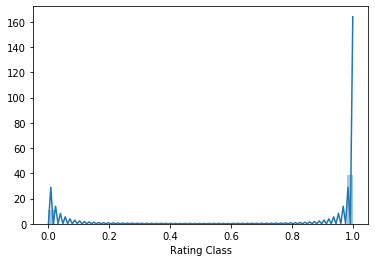

In [287]:
resp = train['Rating Class']
sns.distplot(resp)

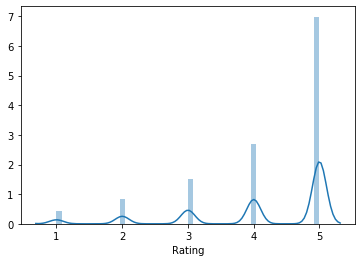

In [288]:
resp = train['Rating']
sns.distplot(resp)

In [289]:
#skewness and kurtosis
print("Skewness: %f" % train['Rating'].skew())#log transformation is usually good for positive skewedness
print("Kurtosis: %f" % train['Rating'].kurt())#tail

Skewness: -1.313529
Kurtosis: 0.804136


# correlation between recommended ind & rating

In [299]:
data['Rating'].corr(data['Recommended IND'])

0.792336287928579

In [300]:
data['Rating Class']=np.where(data['Rating']>3,1,0)

In [301]:
data['Rating Class'].corr(data['Recommended IND'])

0.8117317207682581

In [302]:
data['Rating'].corr(data['Positive Feedback Count'])

-0.06496050712064401

In [303]:
data['Rating Class'].corr(data['Positive Feedback Count'])

-0.06732447335673931

In [304]:
data[data['Rating Class']==0].count()

Unnamed: 0                 5278
Clothing ID                5278
Age                        5278
Title                      4515
Review Text                5193
Rating                     5278
Recommended IND            5278
Positive Feedback Count    5278
Division Name              5278
Department Name            5278
Class Name                 5278
Rating Class               5278
dtype: int64

In [306]:
data[data['Rating Class']==1].count()/data[data['Rating Class']==0].count()

Unnamed: 0                 3.449792
Clothing ID                3.449792
Age                        3.449792
Title                      3.357918
Review Text                3.359908
Rating                     3.449792
Recommended IND            3.449792
Positive Feedback Count    3.449792
Division Name              3.447139
Department Name            3.447139
Class Name                 3.447139
Rating Class               3.449792
dtype: float64

In [70]:
def cutoff_predict(clf, X, cutoff):
    return (clf.predict_proba(X)[:,1]>cutoff).astype(int)

scores =[]
def custom_f1(cutoff):
    def f1_cutoff(clf,X,y):
        ypred = cutoff_predict(clf, X, cutoff)
        return f1_score(y, ypred)
    return f1_cutoff
    

# 

In [82]:
for cutoff in np.arange(0.3,0.8,0.02):
    clf = MultinomialNB()
#clf.fit(train_vectors, y_train) 
    print('cutoff and average f1 score',cutoff, cross_val_score(clf, train_vectors, y, cv=5, scoring = custom_f1(cutoff)).mean())

cutoff and average f1 score 0.3 0.8745741590309475
cutoff and average f1 score 0.32 0.8748202535407499
cutoff and average f1 score 0.34 0.8753189167653448
cutoff and average f1 score 0.36000000000000004 0.8756918429447511
cutoff and average f1 score 0.38000000000000006 0.8762914811128845
cutoff and average f1 score 0.4000000000000001 0.8771148338863892
cutoff and average f1 score 0.4200000000000001 0.8778704385657733
cutoff and average f1 score 0.4400000000000001 0.8787912518187714
cutoff and average f1 score 0.46000000000000013 0.8800389787667264
cutoff and average f1 score 0.48000000000000015 0.8811568410257455
cutoff and average f1 score 0.5000000000000002 0.8824915474096067
cutoff and average f1 score 0.5200000000000002 0.8835348301776931
cutoff and average f1 score 0.5400000000000003 0.8852383698869595
cutoff and average f1 score 0.5600000000000003 0.886856750107181
cutoff and average f1 score 0.5800000000000003 0.8888023497021266
cutoff and average f1 score 0.6000000000000003 0.8

In [84]:
for C in (0.01,0.03,0.09,0.1, 0.2,0.3,0.4, 0.5, 0.7, 1,3,10,30, 100):
    clf = LinearSVC(random_state=0, tol=1e-5, C=C)
    
    print('C and f1_score',C ,cross_val_score(clf, train_vectors, y, cv=5, scoring = 'f1_macro').mean())

C and f1_score 0.01 0.6361747095296524
C and f1_score 0.03 0.7696289810951893
C and f1_score 0.09 0.8152336317535035
C and f1_score 0.1 0.8176454818695353
C and f1_score 0.2 0.8271901510261046
C and f1_score 0.3 0.8290858448863119
C and f1_score 0.4 0.8294784393251036
C and f1_score 0.5 0.829853544508722
C and f1_score 0.7 0.8290790820593447
C and f1_score 1 0.8278705434730502
C and f1_score 3 0.8162571309443226
C and f1_score 10 0.798759609519301


C:\Users\saudebna\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


C and f1_score 30 0.7814485746819088


C:\Users\saudebna\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


C and f1_score 100 0.76643235482606


In [85]:
for C in (0.01,0.03,0.09,0.1, 0.2,0.3,0.4, 0.5, 0.7, 1,3,10,30, 100):
    clf = LinearSVC(random_state=0, tol=1e-5, C=C)
    
    print('C and f1_score',C ,cross_val_score(clf, train_vectors, y, cv=5, scoring = 'accuracy').mean())

C and f1_score 0.01 0.8232987069781407
C and f1_score 0.03 0.8666435860560476
C and f1_score 0.09 0.8847821538470464
C and f1_score 0.1 0.8857613664301673
C and f1_score 0.2 0.8893379001394626
C and f1_score 0.3 0.8895507748050386
C and f1_score 0.4 0.8891249529503658
C and f1_score 0.5 0.8889546495917289
C and f1_score 0.7 0.8879754914012488
C and f1_score 1 0.88674066966769
C and f1_score 3 0.8776713676413103
C and f1_score 10 0.8636209507398487


C:\Users\saudebna\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


C and f1_score 30 0.8496546792538491


C:\Users\saudebna\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


C and f1_score 100 0.8372641081818861


In [86]:
for C in (0.01,0.03,0.09,0.1, 0.2,0.3,0.4, 0.5, 0.7, 1,3,10,30):
    clf = LinearSVC(random_state=0, tol=1e-5, C=C, class_weight ='balanced')
    
    print('C and f1_score',C ,cross_val_score(clf, train_vectors, y, cv=5, scoring = 'accuracy').mean())

C and f1_score 0.01 0.8611079744688196
C and f1_score 0.03 0.8716675623321534
C and f1_score 0.09 0.8794169362728568
C and f1_score 0.1 0.8797150079449517
C and f1_score 0.2 0.8808648865043155
C and f1_score 0.3 0.8809075122038955
C and f1_score 0.4 0.8802261537223061
C and f1_score 0.5 0.8803537588578415
C and f1_score 0.7 0.8797150442067123
C and f1_score 1 0.8772029019561769
C and f1_score 3 0.8682191051612813


C:\Users\saudebna\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


C and f1_score 10 0.8576172723468538


C:\Users\saudebna\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


C and f1_score 30 0.844758199327997
